In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
d1=pd.read_csv('/content/drive/MyDrive/ML_DATAS/Real_Estate.csv')
print("Shape of datset : ",d1.shape)
print("Columns : ",d1.columns)
d1.describe()

Shape of datset :  (414, 8)
Columns :  Index(['No', 'X1_Transaction_Date', 'X2_House_Age',
       'X3_Distance_of_Nearest_MRT_Station', 'X4_Number_of_Convenience_Stores',
       'X5_Latitude', 'X6_Longitude', 'Y_House_Price_of_Unit_Area'],
      dtype='object')


,No,X1_Transaction_Date,X2_House_Age,X3_Distance_of_Nearest_MRT_Station,X4_Number_of_Convenience_Stores,X5_Latitude,X6_Longitude,Y_House_Price_of_Unit_Area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


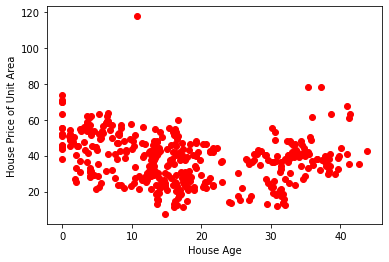

In [ ]:
#visualize the data
plt.xlabel('House Age')
plt.ylabel('House Price of Unit Area')
plt.scatter(d1.X2_House_Age,d1.Y_House_Price_of_Unit_Area,color='red')
plt.show()

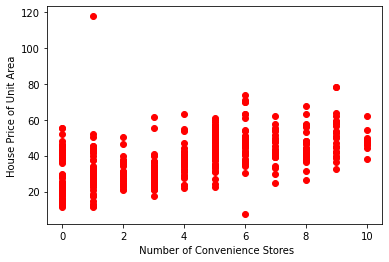

In [ ]:
plt.xlabel(' Number of Convenience Stores')
plt.ylabel('House Price of Unit Area')
plt.scatter(d1.X4_Number_of_Convenience_Stores,d1.Y_House_Price_of_Unit_Area,color='red')
plt.show()

In [ ]:
#split dataset into the training set and test data

In [ ]:
from sklearn.model_selection import train_test_split
training_data,testing_data=train_test_split(d1,test_size=0.2,random_state=0)
print(training_data.head)
print(testing_data.head)

<bound method NDFrame.head of       No  X1_Transaction_Date  X2_House_Age  \
302  303             2013.500          16.5   
20    21             2013.417           4.5   
303  304             2013.500          38.3   
142  143             2013.417          19.8   
14    15             2013.500          13.2   
..   ...                  ...           ...   
323  324             2013.417          28.6   
192  193             2013.167          43.8   
117  118             2013.000          13.6   
47    48             2013.583          35.9   
172  173             2013.583           6.6   

     X3_Distance_of_Nearest_MRT_Station  X4_Number_of_Convenience_Stores  \
302                          2288.01100                                3   
20                           2275.87700                                3   
303                           439.71050                                0   
142                           640.60710                                5   
14                       

In [ ]:
from sklearn import linear_model
slr=linear_model.LinearRegression()
train_x=np.asanyarray(training_data[['X4_Number_of_Convenience_Stores']])
train_y=np.asanyarray(training_data[['Y_House_Price_of_Unit_Area']])
slr.fit(train_x,train_y)
print("X Coefficient: ",slr.coef_)
print("Y Intercept : ",slr.intercept_)

X Coefficient:  [[2.65054866]]
Y Intercept :  [27.3261942]


Text(0, 0.5, 'House price of Unit Area')

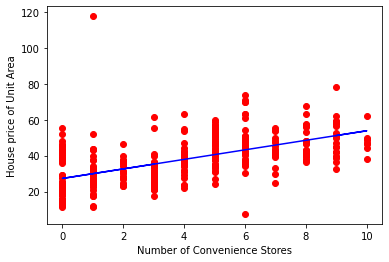

In [ ]:
plt.scatter(training_data.X4_Number_of_Convenience_Stores,training_data.Y_House_Price_of_Unit_Area,color='red')
plt.plot(train_x,slr.coef_[0][0]*train_x+slr.intercept_[0],'-b')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('House price of Unit Area')

In [ ]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(testing_data[['X4_Number_of_Convenience_Stores']])
test_y=np.asanyarray(testing_data[['Y_House_Price_of_Unit_Area']])
test_y_=slr.predict(test_x)
print('Mean absolute error : %.2f' % np.mean(np.absolute(test_y_-test_y)))
print('Residual sum of squares (MSE) : %.2f' %r2_score(test_y,test_y_))

Mean absolute error : 8.47
Residual sum of squares (MSE) : 0.37
